# Train Iris classification model

Like we did back in the first practical we're going back to experimentation.
As a quick reminder:
Three common python packages for scientific computing are numpy, scikit-learn, and pandas.
Pandas is for loading and managing data as tables, Numpy is for faster mathematical functions, and scikit-learn provdes us with some implementations of machine learning algorithms.
You can find information about them at their respective documentaiton sites.
- https://numpy.org/doc/stable/user/index.html#user
- https://pandas.pydata.org/docs/user_guide/10min.html
- https://scikit-learn.org/stable/user_guide.html

## Installing dependencies
Another way to install dependencies in notebooks is by running the commands to do it in a code block.
Requirements files are better, but this can be handy for experimentation where we may not have the exact requirements set yet.


In [1]:
%pip install --user --upgrade pip
%pip install --user --only-binary=:all: scikit-learn pandas mlflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Now we need to import our dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlflow
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Setting up MLFlow
MLFlow needs to know where to send the metrics, models, and other details we give it.
There's multiple ways to do this.
One is to set the `MLFLOW_TRACKING_URI` environment variable.
That's how we'd do it if we were running it in a container or CI/CD environment or just generally any non-experimental environment.
That's because it might need to change depending on where the code runs.
(Azure ML handled this for us)

The other way to do it, which only really is suitable for very early experiments before our full environment is set up is to set it manually which we'll use for now.

In [3]:
mlflow.set_tracking_uri("http://127.0.0.1:8080")
mlflow.autolog()

2025/12/06 07:47:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


Now we can start with our experiment!

     sepalLength  sepalWidth  petalLength  petalWidth            type
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]
(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([50, 50, 50]))
Train length 120
Test length 30


2025/12/06 07:47:11 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f0f74fa958d9478ba9bca50127104aca', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
c:\Users\Mark Agirin\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
2025/12/06 07:47:12 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to endpoint /api/2.0/mlflow/logged-models failed with error code 404 != 200. Response body: '<!doctype html>
<html lang=en>
<title>404 Not Found</title>
<h1>Not Found</h1>
<p>The requested URL was not 

🏃 View run masked-rat-781 at: http://127.0.0.1:8080/#/experiments/0/runs/f0f74fa958d9478ba9bca50127104aca
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/0
Accuracy 0.7666666666666667
AUC 0.8867283950617284


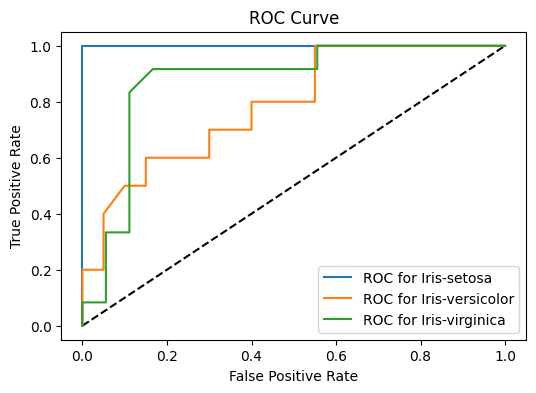

In [4]:
df = pd.read_csv('iris.csv')
print(df)
#Pick out the columns we want to use as inputs
X = df[['sepalLength', 'sepalWidth']].values
Y = df['type'].values
## Now lets take a look at  how many rows we have
len(X)

# And how many different types in each class, we should have 50 of each
print(np.unique(Y, return_counts=True))

#Split the data and keep 20% back for testing later
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
print("Train length", len(X_train))
print("Test length", len(X_test))

model = LogisticRegression(C=1/0.1, solver="liblinear").fit(X_train, Y_train)


testPredictions = model.predict(X_test)
acc = np.average(testPredictions == Y_test)
print("Accuracy", acc)

Y_scores = model.predict_proba(X_test)

#Create a figure
fig = plt.figure(figsize=(6, 4))
#Set labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
#Plot the 50% line
plt.plot([0, 1], [0, 1], 'k--')
# plot ROC curve for the different classes
for idx, className in enumerate(df['type'].unique()):
	fpr, tpr, thresholds = roc_curve(Y_test == className, Y_scores[:,idx])
	seriesName = "ROC for " + className
	# Plot the FPR and TPR achieved by our model
	plt.plot(fpr, tpr, label=seriesName)
#Add a legend
plt.legend()

#Compute the AUC
auc = roc_auc_score(Y_test,Y_scores, multi_class='ovr')
print('AUC', auc)